In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Changing directory
import os
os.chdir('/content/drive/My Drive/Data science')

In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np
#importing the data
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#shape of the data
data.shape

(5000, 14)

In [ ]:
#missing_values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#data types
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
#info of the numerical variables
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#removing unwanted columns: ID and ZIP Code
data = data.drop(['ID', 'ZIP Code'], axis=1)
data.shape

(5000, 12)

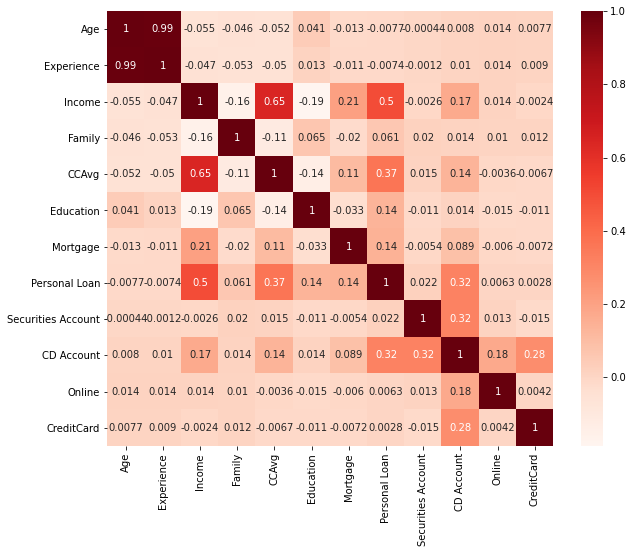

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#heatmap-Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [ ]:
# independant variables
col = list(data.columns)
features = list(set(col) - set(['Personal Loan']))
x = data[features].values
# the dependent variable
y = data['Personal Loan'].values

In [ ]:
#shape of the dependent and independent data
print("Shape of Independent data ", x.shape)
print("Shape of Dependent data ",y.shape)

Shape of Independent data  (5000, 11)
Shape of Dependent data  (5000,)


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:
#Shape
print("Training data shape:")
print('x_train -',x_train.shape)
print('y_train -',y_train.shape)
print("Testing data shape:")
print('x_test -',x_test.shape)
print('y_test -',y_test.shape)

Training data shape:
x_train - (3500, 11)
y_train - (3500,)
Testing data shape:
x_test - (1500, 11)
y_test - (1500,)


# **Logistic regression**

In [ ]:
#importing LogisticRegression and accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

#defining the model
LogRes_model = LogisticRegression()
#fitting the train set to the model
LogRes_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#prediction made
LR_prediction = LogRes_model.predict(x_test)
print(LR_prediction)

[0 0 0 ... 0 0 0]


In [ ]:
#confusion_matrix
LR_conf_matrix = confusion_matrix(y_test, LR_prediction)
print(LR_conf_matrix)

[[1351   21]
 [  51   77]]


In [ ]:
#accuracy_score of the model
LR_accuracy = accuracy_score(y_test, LR_prediction)
print(LR_accuracy)

0.952


In [ ]:
#classification model
from sklearn.metrics import classification_report
LR_report = classification_report(y_test, LR_prediction)
print(LR_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1372
           1       0.79      0.60      0.68       128

    accuracy                           0.95      1500
   macro avg       0.87      0.79      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
print('True positive = ', LR_conf_matrix[0][0])
print('False positive = ', LR_conf_matrix[0][1])
print('False negative = ', LR_conf_matrix[1][0])
print('True negative = ', LR_conf_matrix[1][1])

True positive =  1351
False positive =  21
False negative =  51
True negative =  77


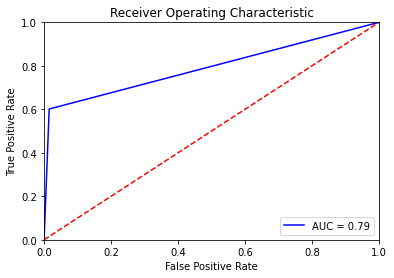

In [ ]:
#ROC Curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, LR_prediction)
roc_auc = metrics.auc(fpr, tpr)
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.51')

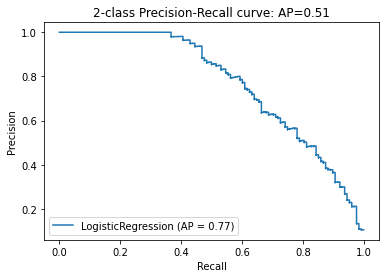

In [ ]:
#Plot the Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
#Compute the average precision score
from sklearn.metrics import average_precision_score
LR_average_precision = average_precision_score(y_test, LR_prediction)

disp = plot_precision_recall_curve(LogRes_model, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(LR_average_precision))

# **kNN**

In [ ]:
#kNN
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

kNN_model = KNeighborsClassifier(n_neighbors = 5)
#fitting the kNN model
kNN_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#kNN predictions
kNN_predictions = kNN_model.predict(x_test)
print(kNN_predictions)

[0 0 0 ... 0 0 0]


In [ ]:
#kNN confusion matrix
kNN_conf_matrix = confusion_matrix(y_test, kNN_predictions)
print(kNN_conf_matrix)

[[1329   43]
 [  83   45]]


In [ ]:
#kNN accuracy
kNN_accuracy = accuracy_score(y_test, kNN_predictions)
print(kNN_accuracy)

0.916


In [ ]:
#kNN classification report
from sklearn.metrics import classification_report
kNN_report = classification_report(y_test, kNN_predictions)
print(kNN_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1372
           1       0.51      0.35      0.42       128

    accuracy                           0.92      1500
   macro avg       0.73      0.66      0.69      1500
weighted avg       0.90      0.92      0.91      1500



In [ ]:
print('True positive = ', kNN_conf_matrix[0][0])
print('False positive = ', kNN_conf_matrix[0][1])
print('False negative = ', kNN_conf_matrix[1][0])
print('True negative = ', kNN_conf_matrix[1][1])

True positive =  1329
False positive =  43
False negative =  83
True negative =  45


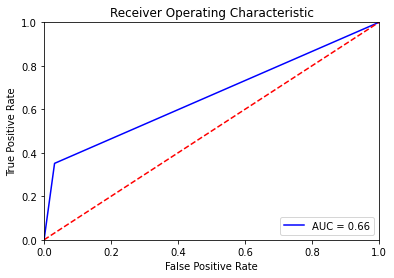

In [ ]:
#ROC Curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, kNN_predictions)
roc_auc = metrics.auc(fpr, tpr)
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.24')

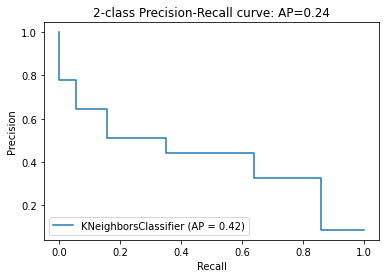

In [ ]:
#Compute the average precision score
from sklearn.metrics import average_precision_score
kNN_average_precision = average_precision_score(y_test, kNN_predictions)

#Plot the Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(kNN_model, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(kNN_average_precision))